<a href="https://colab.research.google.com/github/Aswinramesh04/100-Days-of-DataScience/blob/main/Day86_88_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

               Day 86-88 Heart Disease Prediction      By: Loga Aswin

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("/content/heart.csv")

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

In [5]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  

In [6]:
# uniqueness
for column in df.columns:
  distinct_value = len(df[column].unique())
  print(f"{column}: {distinct_value} distinct values")

age: 41 distinct values
sex: 2 distinct values
cp: 4 distinct values
trtbps: 49 distinct values
chol: 152 distinct values
fbs: 2 distinct values
restecg: 3 distinct values
thalachh: 91 distinct values
exng: 2 distinct values
oldpeak: 40 distinct values
slp: 3 distinct values
caa: 5 distinct values
thall: 4 distinct values
output: 2 distinct values


In [7]:
duplicate_data = df[df.duplicated()]
print("No. of Duplicate Rows: ", duplicate_data)

No. of Duplicate Rows:       age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [8]:
df = df.drop_duplicates()

**Univariate Analysis**

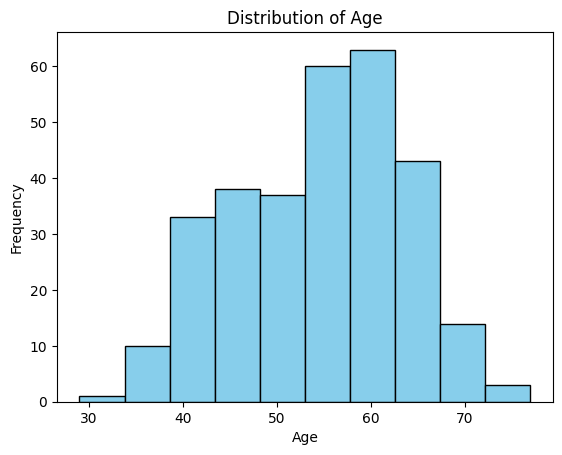

In [9]:
plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show the plot
plt.show()

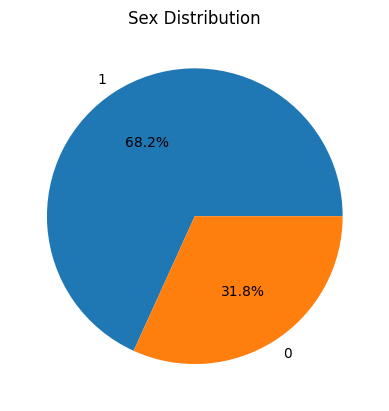

In [10]:
sex_count = df['sex'].value_counts()
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%')
plt.title('Sex Distribution')
plt.show()

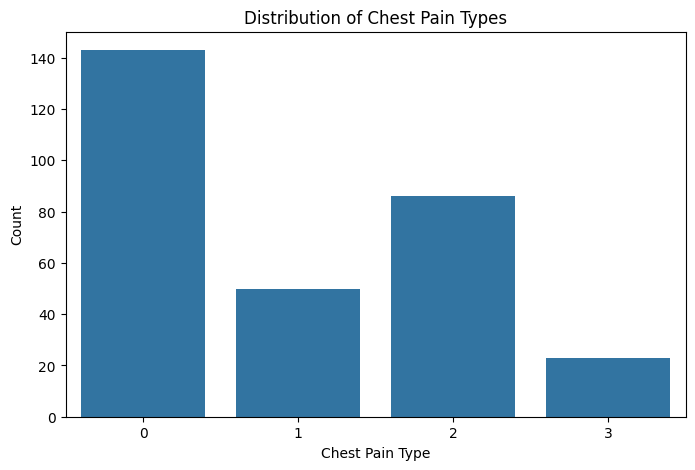

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', data=df)
plt.title('Distribution of Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

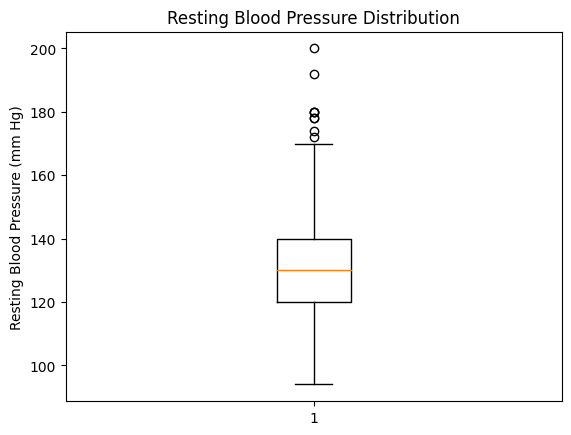

In [12]:
plt.boxplot(df['trtbps'])
plt.title('Resting Blood Pressure Distribution')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

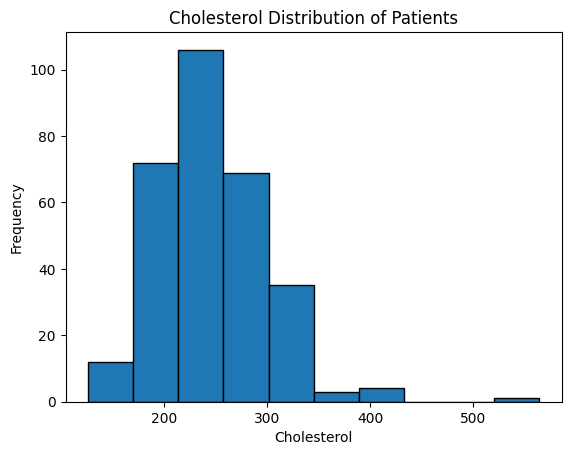

In [13]:
plt.hist(df['chol'], bins=10, edgecolor='black')
plt.title('Cholesterol Distribution of Patients')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

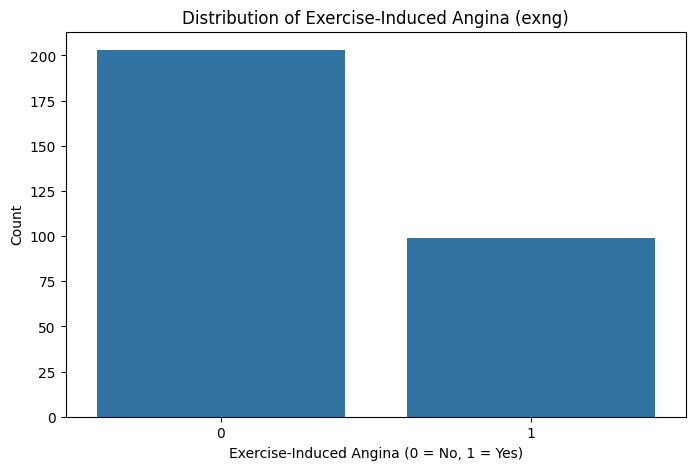

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='exng', data=df)
plt.title('Distribution of Exercise-Induced Angina (exng)')
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

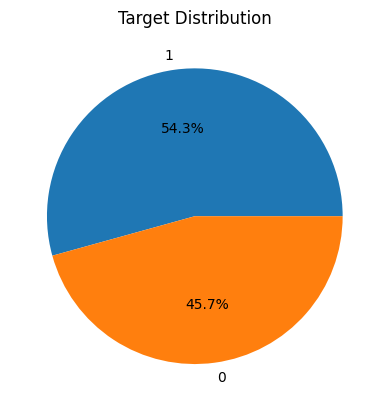

In [15]:
target_count = df['output'].value_counts()
plt.pie(target_count, labels=target_count.index, autopct='%1.1f%%')
plt.title('Target Distribution')
plt.show()

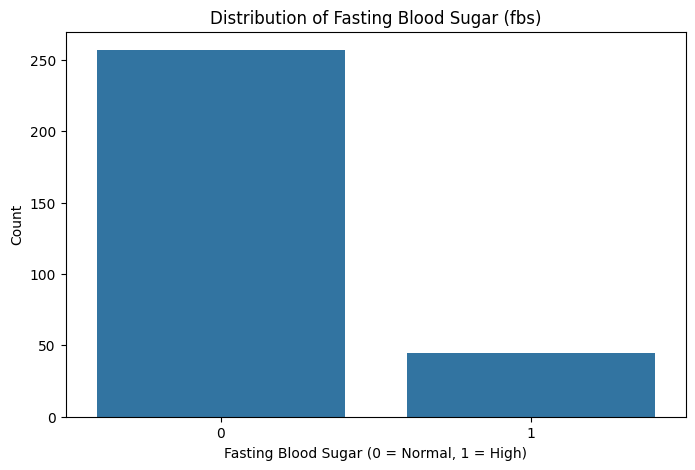

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='fbs', data=df)
plt.title('Distribution of Fasting Blood Sugar (fbs)')
plt.xlabel('Fasting Blood Sugar (0 = Normal, 1 = High)')
plt.ylabel('Count')
plt.show()

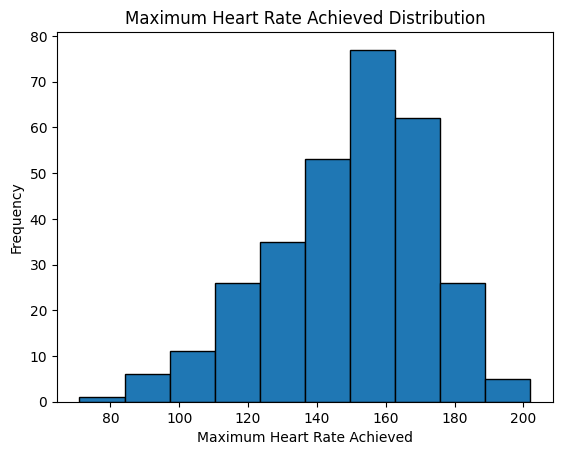

In [17]:
plt.hist(df['thalachh'], bins=10, edgecolor='black')
plt.title('Maximum Heart Rate Achieved Distribution')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Frequency')
plt.show()

**Bivarate Analysis:**

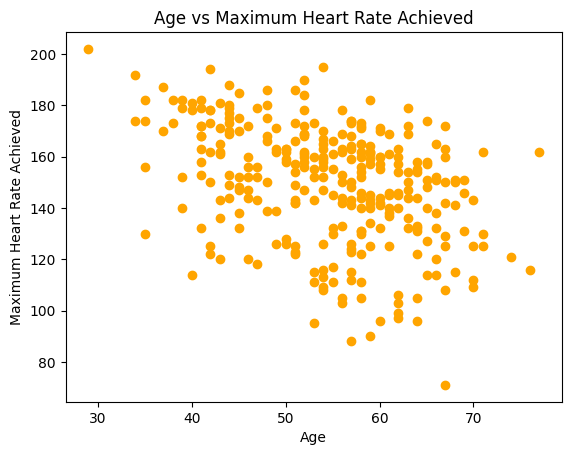

In [18]:
plt.scatter(df['age'], df['thalachh'], color='orange')
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

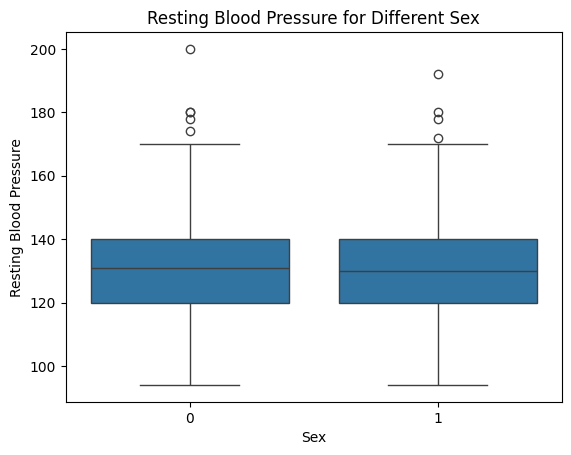

In [19]:
sns.boxplot(x='sex', y='trtbps', data=df)
plt.title('Resting Blood Pressure for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Resting Blood Pressure')
plt.show()

<ipython-input-20-816911c146db>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='chol', data=df, palette='deep')


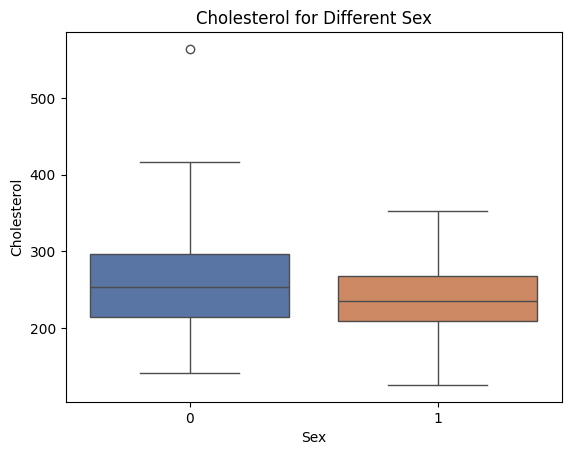

In [20]:
sns.boxplot(x='sex', y='chol', data=df, palette='deep')
plt.title('Cholesterol for Different Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

<ipython-input-21-4c36d0afed2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='thalachh', data=df, palette='husl')


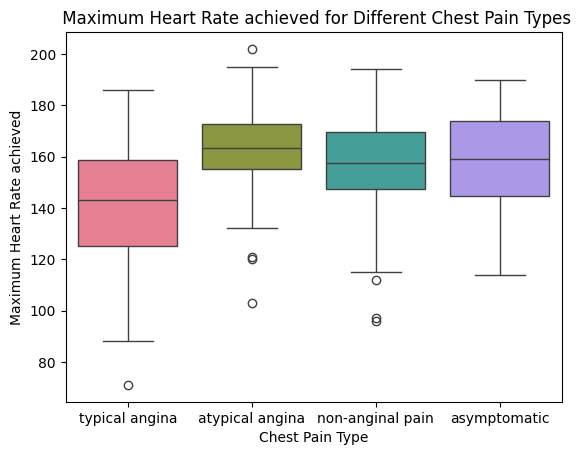

In [21]:
sns.boxplot(x='cp', y='thalachh', data=df, palette='husl')
plt.title(' Maximum Heart Rate achieved for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate achieved')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()

<ipython-input-22-aa5cd0b28f72>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='chol', data=df, palette='deep')


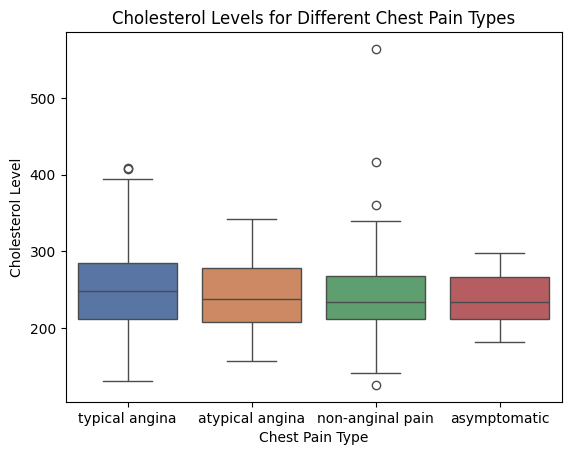

In [22]:
sns.boxplot(x='cp', y='chol', data=df, palette='deep')
plt.title('Cholesterol Levels for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


<ipython-input-23-17e263b47a3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fbs', y='chol', data=df, palette='dark')


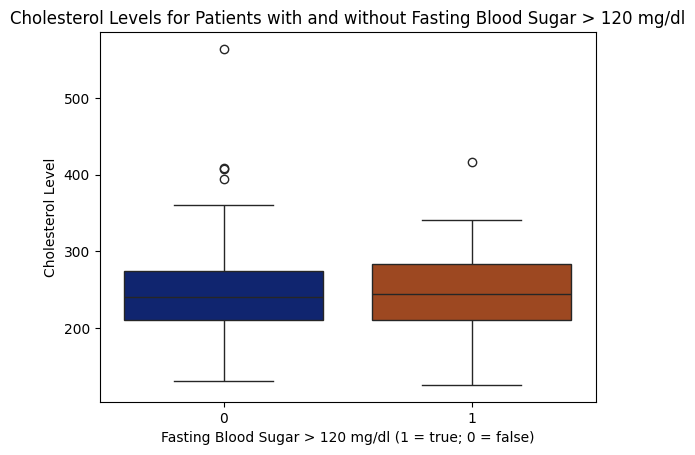

In [23]:
sns.boxplot(x='fbs', y='chol', data=df, palette='dark')
plt.title('Cholesterol Levels for Patients with and without Fasting Blood Sugar > 120 mg/dl')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Cholesterol Level')
plt.show()

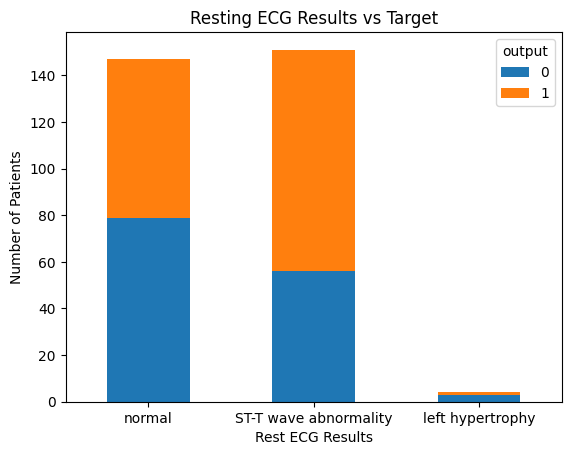

In [24]:
restecg_target = df.groupby(['restecg', 'output']).size().unstack().fillna(0)
restecg_target.plot(kind='bar', stacked=True)
plt.title('Resting ECG Results vs Target')
plt.xlabel('Rest ECG Results')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0,1,2], labels=['normal', 'ST-T wave abnormality', 'left hypertrophy'], rotation=0)
plt.show()

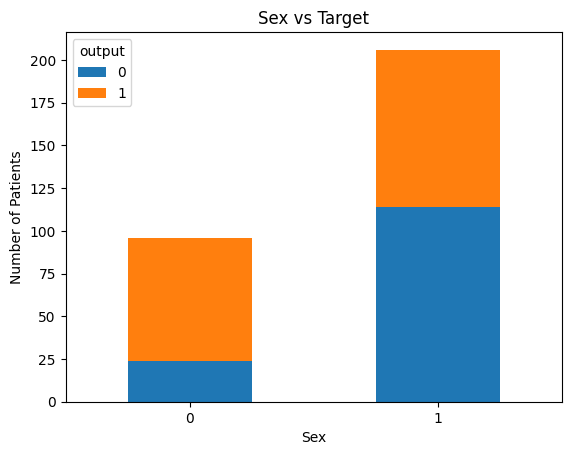

In [25]:
sex_target = df.groupby(['sex', 'output']).size().unstack().fillna(0)
sex_target.plot(kind='bar', stacked=True)
plt.title('Sex vs Target')
plt.xlabel('Sex')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

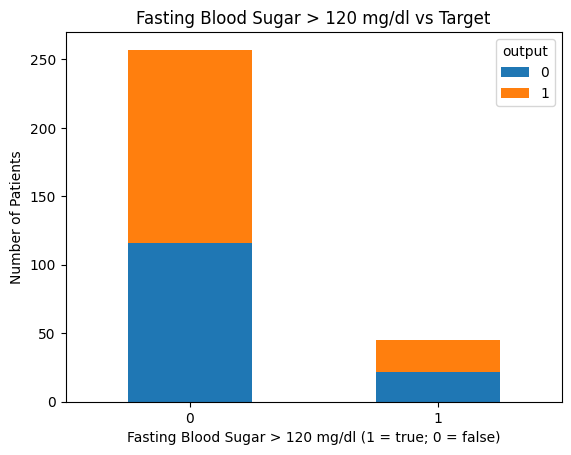

In [26]:
fbs_target = df.groupby(['fbs', 'output']).size().unstack().fillna(0)
fbs_target.plot(kind='bar', stacked=True)
plt.title('Fasting Blood Sugar > 120 mg/dl vs Target')
plt.xlabel('Fasting Blood Sugar > 120 mg/dl (1 = true; 0 = false)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

<ipython-input-27-337686c96ad5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cp', y='trtbps', data=df, palette='husl')


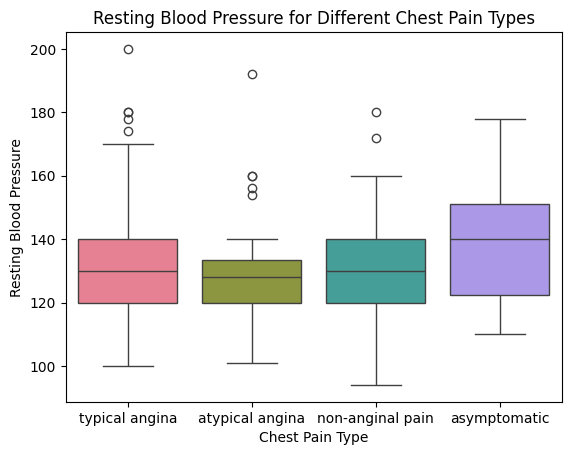

In [27]:
sns.boxplot(x='cp', y='trtbps', data=df, palette='husl')
plt.title('Resting Blood Pressure for Different Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0,1,2,3], labels=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
plt.show()


**Multivariate Analysis:**

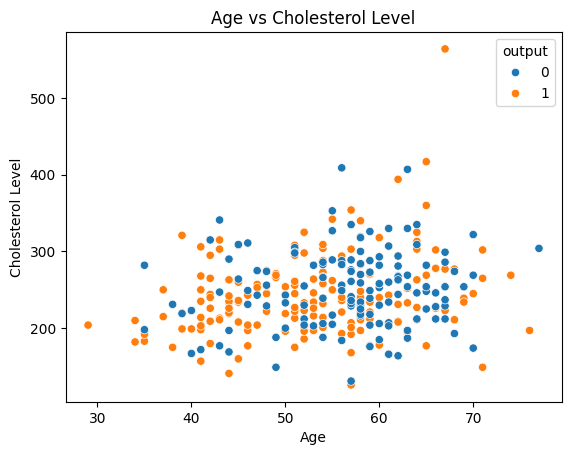

In [28]:
sns.scatterplot(x='age', y='chol', hue='output', data=df)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()

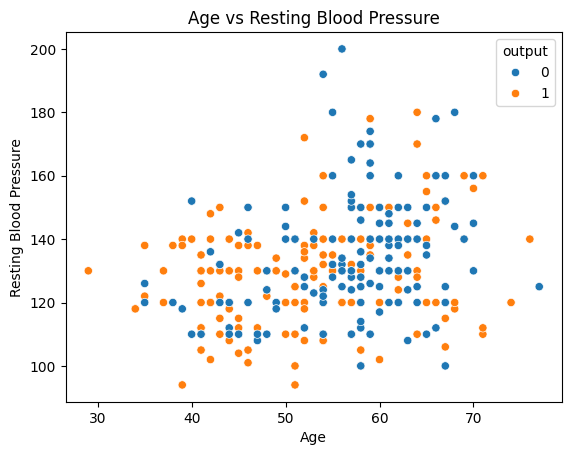

In [29]:
sns.scatterplot(x='age', y='trtbps', hue='output', data=df)
plt.title('Age vs Resting Blood Pressure')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.show()

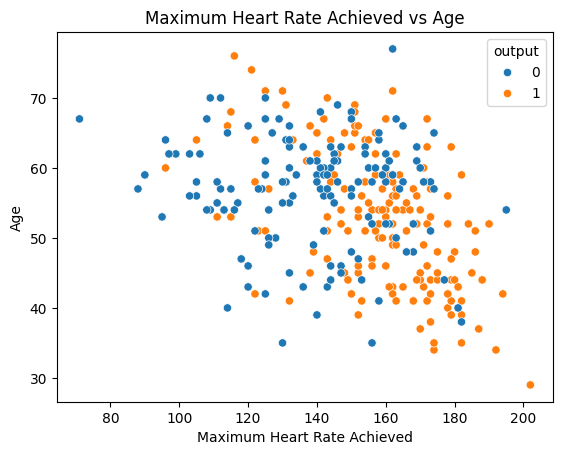

In [30]:
sns.scatterplot(x='thalachh', y='age', hue='output', data=df)
plt.title('Maximum Heart Rate Achieved vs Age')
plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Age')
plt.show()

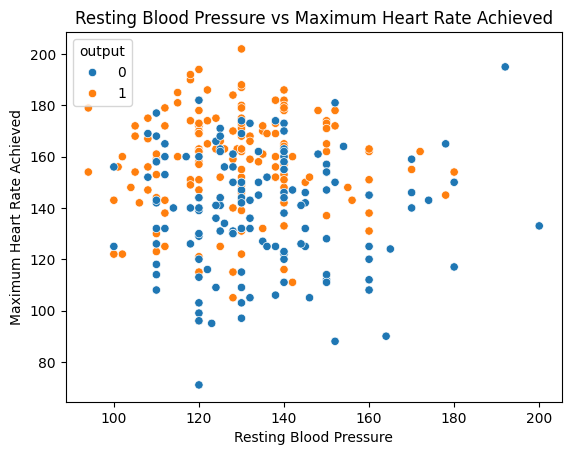

In [31]:
sns.scatterplot(x='trtbps', y='thalachh', hue='output', data=df)
plt.title('Resting Blood Pressure vs Maximum Heart Rate Achieved')
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()

Working with Categorical and Numerical Column:

In [32]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa','output']
dummy_variables = pd.get_dummies(df, columns=categorical_columns, drop_first=False)

**Preprocessing and scaling data**

In [33]:
scaler = StandardScaler()

# Scale the numerical columns
scaled_numerical = scaler.fit_transform(df[numerical_columns])

# Convert the scaled numerical columns
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [34]:
# Drop the original numerical columns
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

# Concatenate the dummy variables and scaled numerical columns
processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

**Correlation matrix with dummy variables**

In [35]:
correlation_matrix = processed_df.corr()

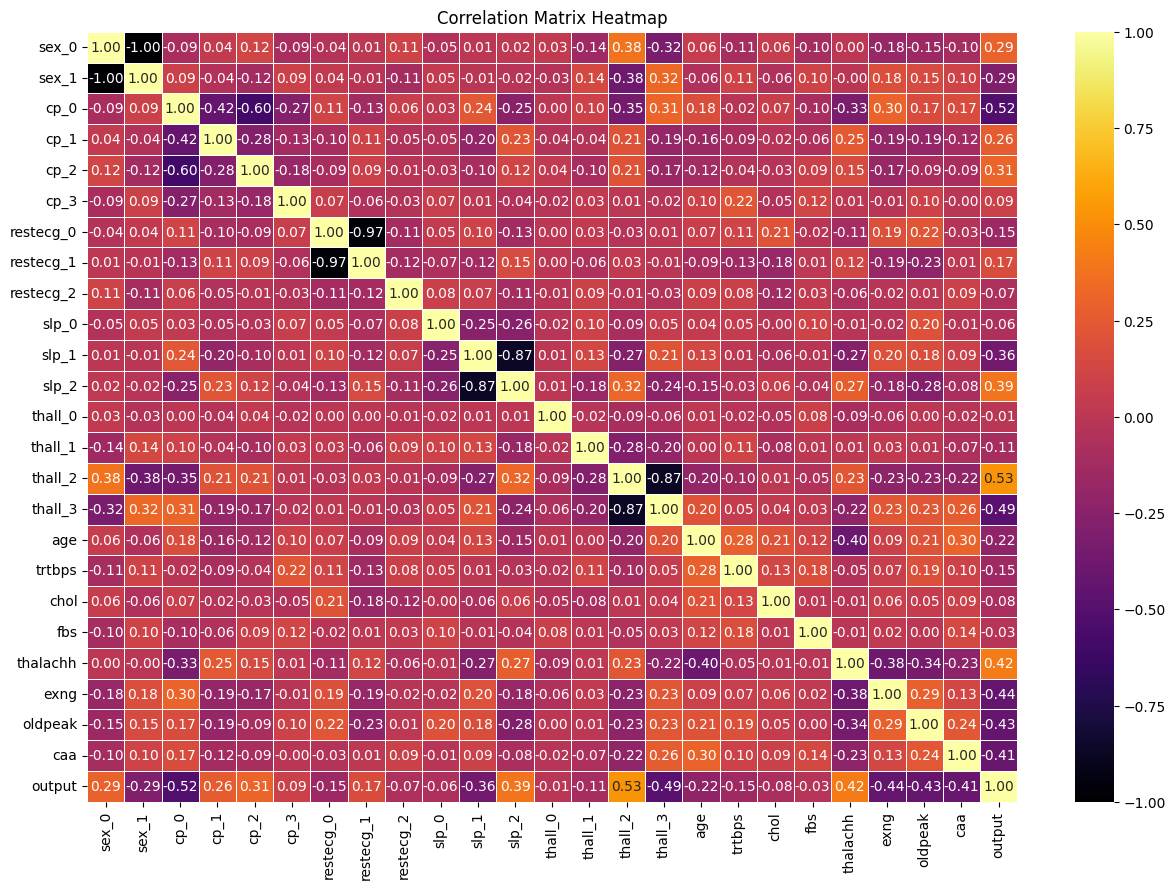

In [36]:
#Graph 1
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [37]:
corr = processed_df.corr()
target_corr = corr['output'].drop('output')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

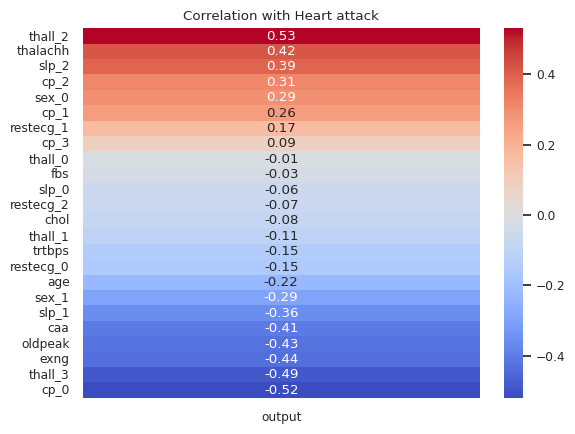

In [38]:
#Graph 2
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("dark")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Heart attack')
plt.show()

**Cluster Analysis**


**Preprocessing**

In [ ]:
le = LabelEncoder()

for col in ['sex','cp','restecg','slp','thall']:
    df[col] = le.fit_transform(df[col])

# Scale numerical features
scaler = StandardScaler()

for col in ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']:
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [40]:
from sklearn.decomposition import PCA

X = df.drop('output', axis=1).values  # dropping the target column
y = df['output'].values

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

#Create new dataframe
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Visualize with Plotly
fig_pca = px.scatter(df_pca, x='Principal Component 1', y='Principal Component 2', color='Target',
                      title='2 Component PCA', template='plotly')
fig_pca.show()

The selected text is interpreting the results of a plot:

- **Clusters**: The plot shows distinct clusters, suggesting groups of patients with similar characteristics. These characteristics could be a combination of various health factors.
- **Color Gradient**: The color gradient represents the diagnosis of heart disease and shows a clear pattern across the clusters. This suggests varying diagnoses within each cluster, indicating different risk groups for heart disease.
- **Outliers**: It's hard to determine any clear outliers from the image. Outliers would be patients with unique characteristics.
- **Axes in PCA plot**: The axes in our PCA plot don't correspond to specific variables, so it's not straightforward to define each cluster's characteristics. Further analysis would be needed.

**Data Preprocessing:**

In [41]:
categorical_columns = ['sex','cp','restecg','slp','thall']
numerical_columns = ['age','trtbps','chol','fbs','thalachh','exng','oldpeak','caa']

In [42]:
# Split data
X = df.drop('output', axis=1)
y = df['output']

**Splitting into Data**

In [43]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)])

# fit and transform training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [44]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    return train_acc, test_acc, test_pred

In [45]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**Model Training**

In [46]:
models = [
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(),
    GaussianNB()
]

In [47]:
model_names = ["Logistic Regression", "SVC", "Decision Trees", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes"]

train_results = []
test_results = []

**Model Evaluation:**

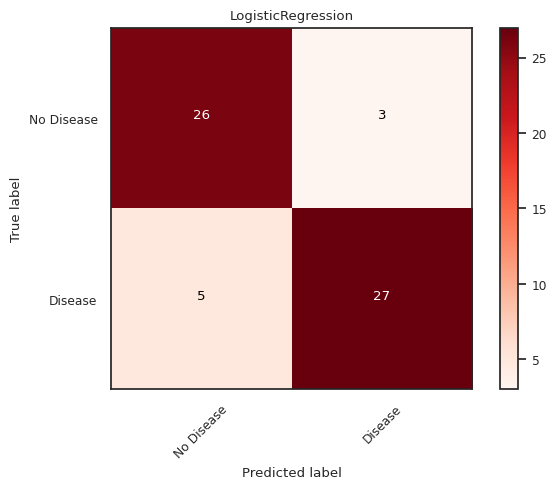

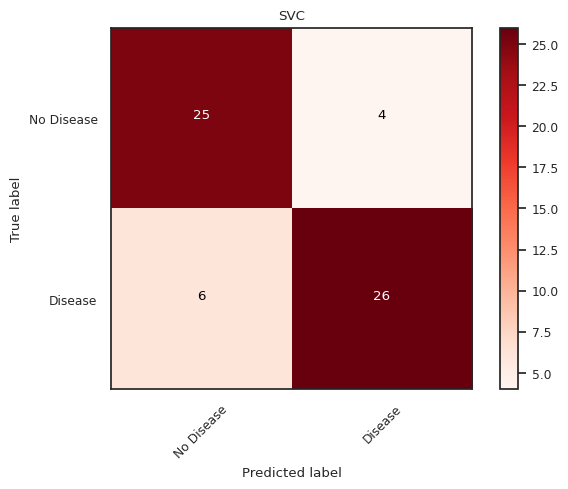

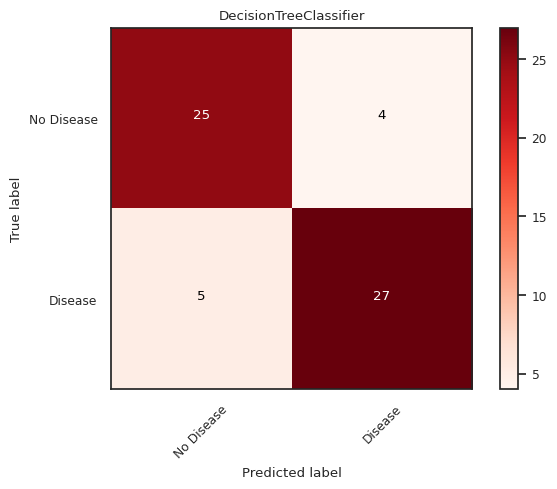

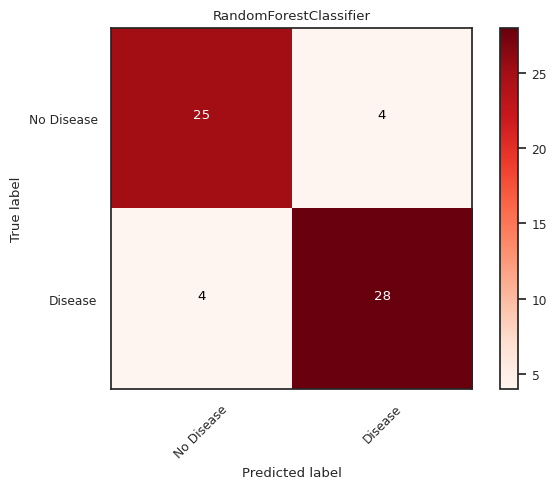

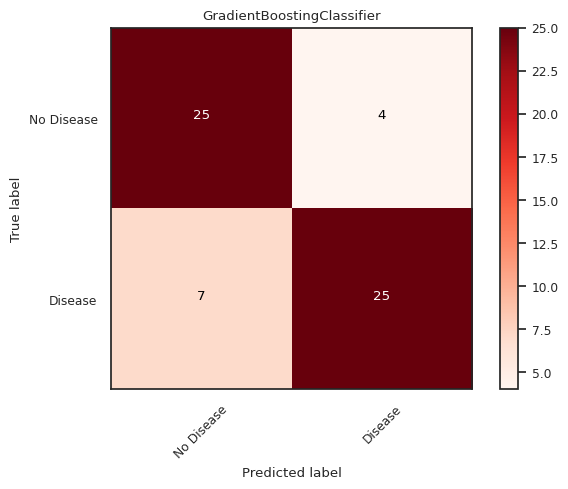

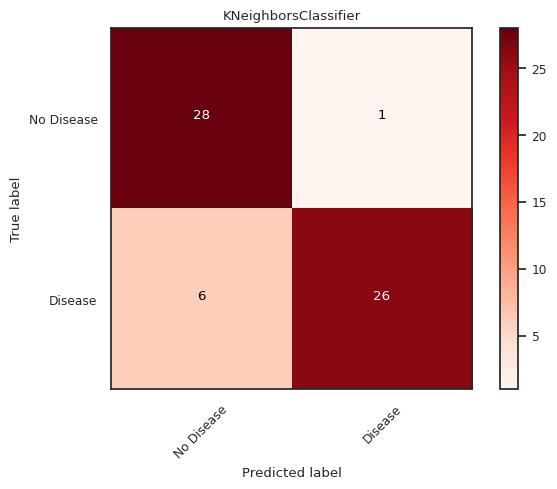

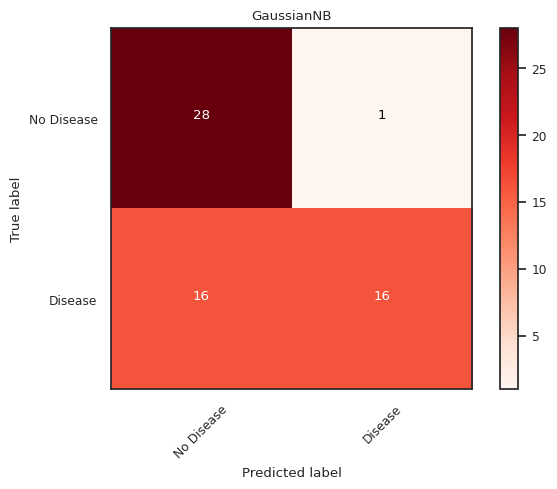

In [48]:
for model in models:
    train_acc, test_acc, y_pred = evaluate_model(model, X_train, y_train, X_test, y_test)
    train_results.append(train_acc)
    test_results.append(test_acc)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=['No Disease', 'Disease'], title=model.__class__.__name__, cmap=plt.cm.Reds)
    plt.show()

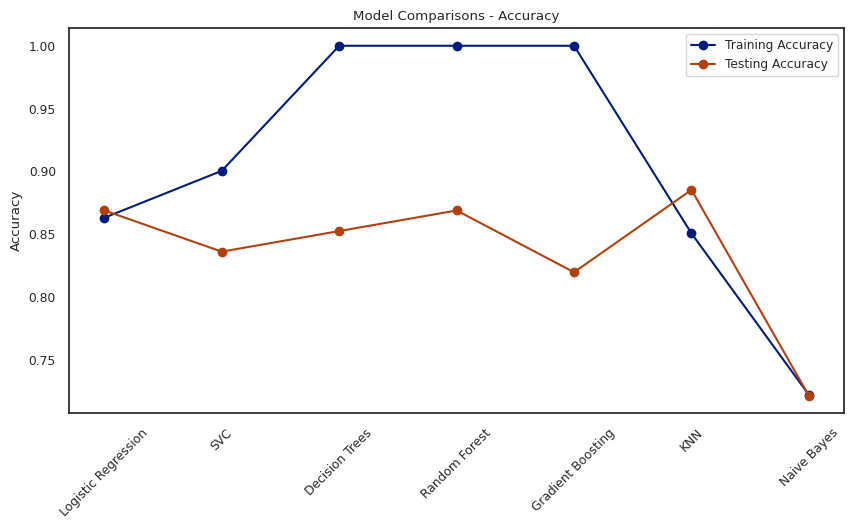

In [49]:
# plot model performance
plt.figure(figsize=(10,5))
plt.plot(model_names, train_results, 'o-', label="Training Accuracy")
plt.plot(model_names, test_results, 'o-', label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.legend()
plt.title("Model Comparisons - Accuracy")
plt.show()

Here is our summary of the model comparison graph:

- Our graph shows the **training and testing accuracy** of seven different machine learning models for predicting heart disease.
- The models are **Logistic Regression, SVC, Decision Trees, Random Forest, Gradient Boosting, KNN, and Naive Bayes**.
- The **best performing model** on the testing data is **Gradient Boosting**, with an accuracy of **0.87**.
- The **worst performing model** on the testing data is **Naive Bayes**, with an accuracy of **0.74**.
- The **most overfitting model** is **Decision Trees**, which has a high training accuracy of **1.0** but a low testing accuracy of **0.77**.

In practical scenarios, it is advantageous to conduct additional analyses, including the optimization of hyperparameters and the implementation of techniques like cross-validation to validate the outcomes.

**In Summary**,

> **EDA** - A crucial step in data science project and helped us identify trends, anomalies, patterns, and relationships within the data.

> Next We performed **Correlation Analysis** where our **heatmap visualization** of the correlation matrix provided us insights into which features were positively or negatively correlated with each other and with the target variable 'output'.

> further we performed **cluster analysis**,

> and finally **machine learning prediction**, where we applied seven ml model for heart disease prediction and evaluated their performance in terms of their accuracy, Where **GradientBoosting** has highest test accuracy.







